<a href="https://colab.research.google.com/github/mharrisonbaker/samplework/blob/master/CFPB_sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from faker import Faker
import pandas as pd
import numpy as np

In [26]:
#intialize dummy dataset
fake = Faker()
profileData = [fake.profile() for i in range(10000)]
df = pd.DataFrame(profileData)

In [27]:
#drop unrelated
df = df.drop(columns=['blood_group', 'website','username', 'mail', 'birthdate', 'residence'])

In [28]:
#rename unrelated
df.rename(columns={'address': 'business_address'}, inplace=True)

In [29]:
#add data
ethnicity = ['Asian', 'Black', 'Hispanic', 'White']
df['Ethnicity'] = np.random.choice(list(ethnicity), len(df))

In [30]:
#add data
mode = ['In-Person', 'Telephone', 'Online', 'Email']
df['mode'] = np.random.choice(list(mode), len(df))

In [31]:
#add data
rec_type = ['Lender', 'Affiliate', 'Third-Party']
df['receipt_type'] = np.random.choice(list(rec_type), len(df))

In [32]:
#add data
action = ['Originated', 'Approved Not Accepted', 'Denied', 'Withdrawn by Applicant', 'Incomplete']
df['action'] = np.random.choice(list(action), len(df))

In [33]:
#add data
np.random.seed(2018)
df['amount']=np.random.beta(2, 5, len(df))*100000

In [34]:
#add date time data
#functions
def random_dates(start, end, n=len(df)):

    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

In [35]:
#add date time data
start = pd.to_datetime('2016-01-01')
end = pd.to_datetime('2021-01-01')
df['application_date'] = random_dates(start, end)

In [36]:
df

,job,company,ssn,current_location,name,sex,business_address,Ethnicity,mode,receipt_type,action,amount,application_date
0,Chief of Staff,Fisher Ltd,385-26-5326,"(83.277495, -38.991699)",Mary Garcia,F,"044 Mcintosh Mountains\nNorth Isaac, MO 12204",Black,Email,Lender,Approved Not Accepted,18094.172800,2016-02-02 21:24:25
1,"Chemist, analytical","Short, Scott and Benitez",775-46-0011,"(-4.0149875, -80.289893)",Bianca Ingram,F,"7292 Vanessa Mission\nNew Anthonystad, MT 65042",White,In-Person,Affiliate,Withdrawn by Applicant,26192.478363,2017-02-12 16:39:07
2,Homeopath,"Moore, Mathews and Parker",039-41-2587,"(-68.7574675, -149.520643)",Ronald Campbell,M,146 Christina Island Suite 934\nRichardsonmout...,Asian,In-Person,Affiliate,Withdrawn by Applicant,14055.506702,2018-12-19 07:45:00
3,Social worker,Dougherty-Park,220-45-1680,"(-59.2328625, 119.984729)",Bryan Miller,M,"4025 Kevin Estate\nJoneschester, HI 08136",Black,Online,Lender,Approved Not Accepted,7172.967627,2017-11-18 12:41:17
4,Animal nutritionist,"Strickland, Stout and Williams",331-09-7002,"(4.830210, -159.024198)",Sonya Foley,F,"68414 Alvarez Row Suite 751\nJuliefort, KY 36726",Asian,Email,Lender,Withdrawn by Applicant,11830.031036,2016-09-19 20:38:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Soil scientist,"Walker, Baker and Ortiz",048-21-3081,"(-12.358309, -36.689564)",Valerie Murphy,F,"891 Robert Falls Suite 519\nGabriellebury, MA ...",White,Online,Lender,Denied,40696.577685,2017-08-14 17:48:24
9996,Structural engineer,Bautista-Smith,849-76-3874,"(12.1768385, -59.206341)",Dustin Garcia,M,"89498 Sara Parkways\nEast Janet, CA 04391",White,Online,Lender,Denied,46912.744133,2017-04-16 22:20:01
9997,Building control surveyor,Barr-Foster,545-72-8528,"(-72.737750, -43.397274)",Ethan Colon,M,"0359 Lewis Hill\nHerreraview, OH 49900",Black,Telephone,Third-Party,Withdrawn by Applicant,39242.930602,2019-05-15 06:41:45
9998,Herbalist,"Hurst, Gordon and Holmes",581-91-0123,"(9.228280, -154.565995)",Tammy Moore,F,"7891 Benjamin Rapid Apt. 044\nNew Crystalton, ...",Asian,Online,Affiliate,Incomplete,69675.347626,2017-03-16 14:04:26


In [37]:
df.dtypes

job                         object
company                     object
ssn                         object
current_location            object
name                        object
sex                         object
business_address            object
Ethnicity                   object
mode                        object
receipt_type                object
action                      object
amount                     float64
application_date    datetime64[ns]
dtype: object

In [54]:
#mean loan application amounts by sex and ethnicity
df.groupby(["sex", "Ethnicity"])["amount"].mean()

sex  Ethnicity
F    Asian        29187.813271
     Black        28479.467059
     Hispanic     28977.441557
     White        28883.687717
M    Asian        28220.473481
     Black        28021.226018
     Hispanic     28347.548982
     White        28894.339477
Name: amount, dtype: float64

In [38]:
import seaborn as sns


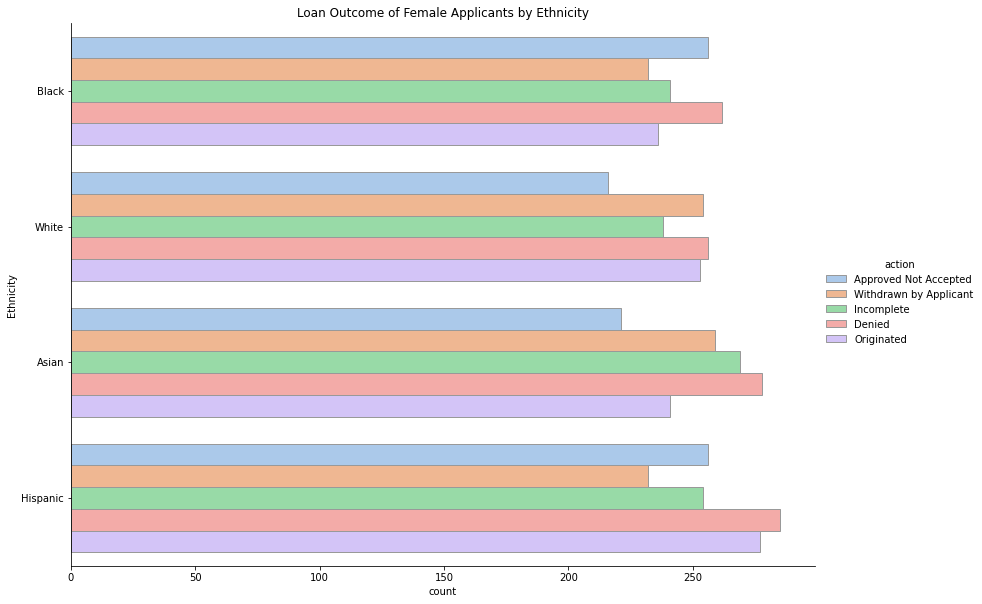

In [39]:
sns.catplot(
    data=df.loc[df['sex'] == 'F'], y="Ethnicity", hue="action", kind="count", 
    palette="pastel", edgecolor=".6",height=8.27, aspect=11.7/8.27
    
).set(title = 'Loan Outcome of Female Applicants by Ethnicity')

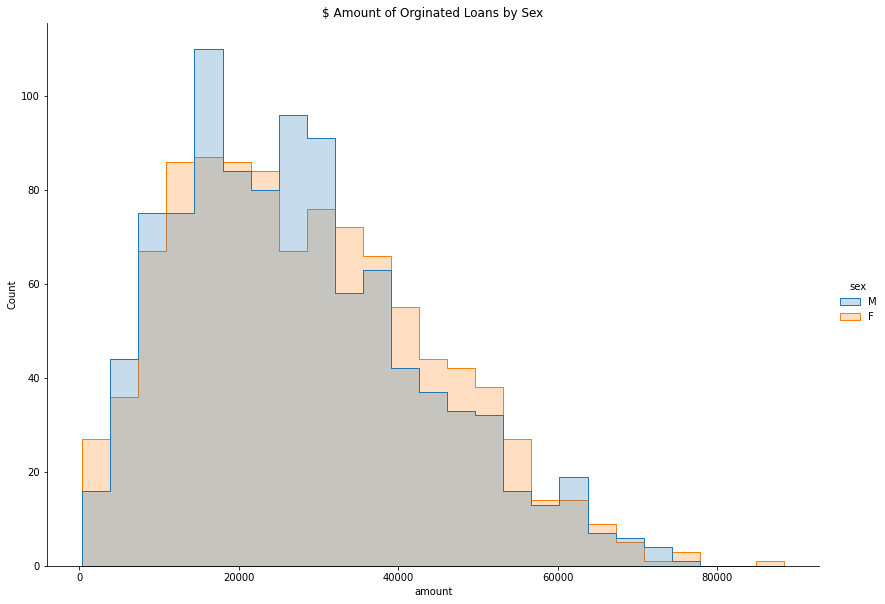

In [40]:
sns.displot(df.loc[df['action'] == 'Originated'], x="amount", hue="sex", element="step", height=8.27, aspect=11.7/8.27).set(title = '$ Amount of Orginated Loans by Sex')